In [13]:
# Victor Z and Ugochukwu Ikegwu
# UW-Madison, 2024
# basis functions for neural nets

## Start here if working on google collab

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [16]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [17]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [18]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Define the functions that are being optimized
def myfun(beta, data):
    m = data['m']
    x = data['x']
    y_pred = np.zeros_like(data['y'])

    theta = beta[:m]
    w = beta[m:2*m]
    bias = beta[2*m:3*m]

    for k in range(m):
        z = theta[k] * x + bias[k]
        yn = 1 / (1 + np.exp(-z))
        y_pred += w[k] * yn

    return y_pred - data['y']

def myfun2(beta, x, m):
    y_pred = np.zeros(len(x))

    theta = beta[:m]
    w = beta[m:2*m]
    bias = beta[2*m:3*m]

    for k in range(m):
        z = theta[k] * x + bias[k]
        yn = 1 / (1 + np.exp(-z))
        y_pred += w[k] * yn

    return y_pred

In [20]:
# Data preparation
x = np.linspace(-1, 1, 20)
y = np.sin(4 * x) + np.sin(8 * x) + np.exp(-x)

data = {'x': x, 'y': y, 'm': 6, 'n': len(x)}

In [21]:
# Initial guess for the parameters
beta = np.ones(3 * data['m'])

# Optimization using least_squares from scipy
result = least_squares(myfun, beta, args=(data,), method='trf', verbose=0, max_nfev=5000)

betahat = result.x

# Calculate the predicted values
yhat = myfun(betahat, data) + data['y']

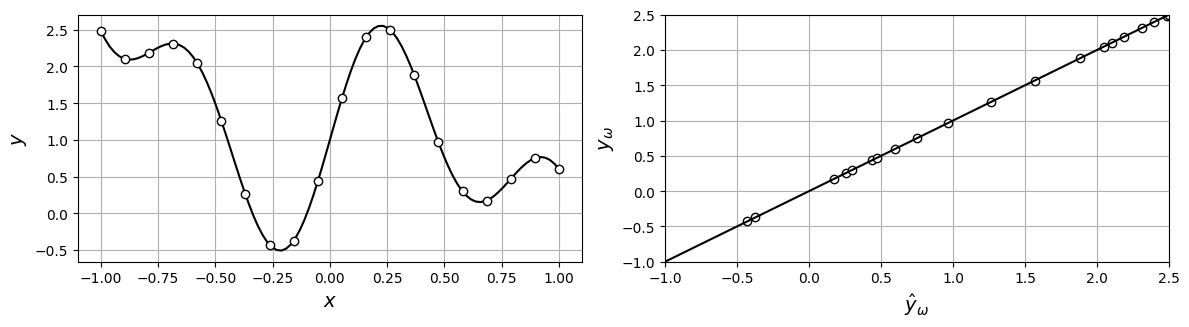

In [22]:
# Plotting
xv = np.linspace(-1, 1, 100)
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(xv, myfun2(betahat, xv, data['m']), 'black', linewidth=1.5)
plt.plot(x, y, 'o', color='black', markerfacecolor='w')
plt.grid(True)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)

plt.subplot(2, 2, 2)
xx = np.linspace(-1, 2.5, 100)
plt.plot(yhat, data['y'], 'o', color='black', markerfacecolor='w')
plt.plot(xx, xx, 'black')
plt.axis([-1, 2.5, -1, 2.5])
plt.xlabel('$\hat{y}_\omega$', fontsize=14)
plt.ylabel('$y_\omega$', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

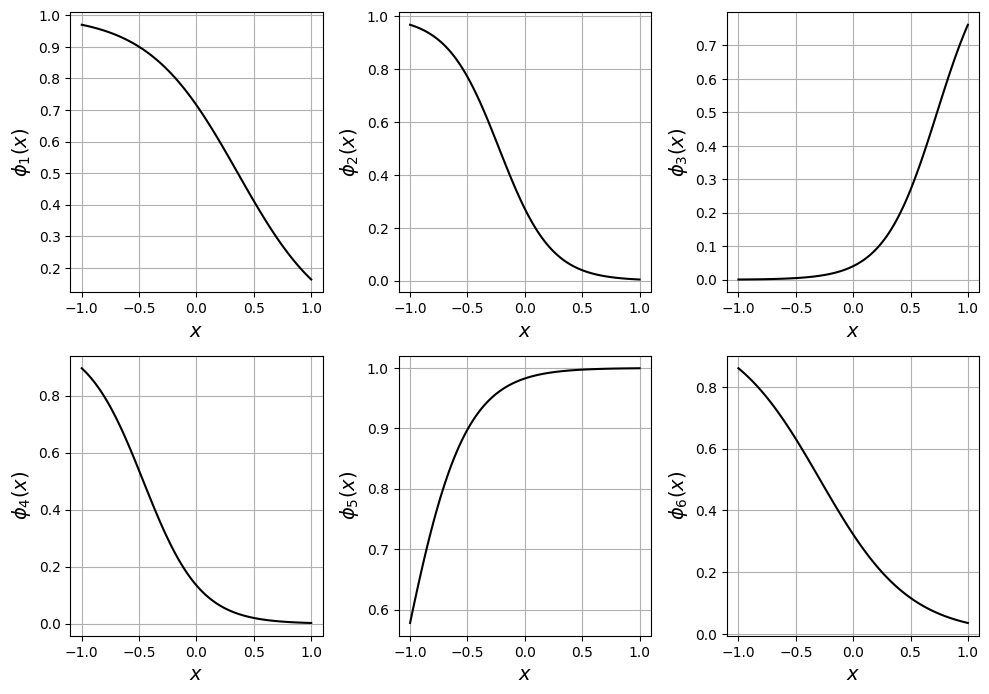

In [23]:
# Additional plotting
plt.figure(figsize=(10, 10))
theta = betahat[:data['m']]
w = betahat[data['m']:2*data['m']]
bias = betahat[2*data['m']:3*data['m']]

for k in range(data['m']):
    z = theta[k] * xv + bias[k]
    yn = 1 / (1 + np.exp(-z))

    plt.subplot(3, 3, k + 1)
    plt.plot(xv, yn, 'black', linewidth=1.5)
    plt.grid(True)
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel(f'$\\phi_{k+1}(x)$', fontsize=14)

plt.tight_layout()
plt.show()

In [24]:
# Approximating the Hessian matrix
H = result.jac.T @ result.jac

# Check eigenvalues of the Hessian
lambda_vals = np.linalg.eigvals(H)
print("Eigenvalues of the Hessian matrix:\n")
print(pd.DataFrame(lambda_vals))

Eigenvalues of the Hessian matrix:

               0
0   3.663110e+05
1   9.061391e+04
2   9.412976e+03
3   1.432595e+03
4   2.427310e+02
5   2.525439e+01
6   1.262083e+01
7   2.530994e+00
8   1.698688e-01
9   2.935327e-02
10  2.860112e-03
11  6.148463e-04
12  9.311160e-06
13  1.000040e-07
14  5.048483e-10
15  9.704622e-13
16  2.951028e-15
17  1.408600e-13
